In [45]:
import matplotlib
import numpy as np
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import math
import tqdm as tq
from tinygrad.nn.datasets import mnist
from matplotlib import pyplot as plt

In [6]:
X_train, Y_train, X_test, Y_test = mnist()
X_train = X_train.reshape(-1, 784).numpy().astype(np.float32)
Y_train = Y_train.numpy().astype(np.int8)
X_test = X_test.reshape(-1, 784).numpy().astype(np.float32)
Y_test = Y_test.numpy().astype(np.int8)

In [90]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lay1 = nn.Linear(784, 128, bias=False)
        self.lay2 = nn.Linear(128, 10, bias=False)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = F.relu(self.lay1(x))
        x = self.lay2(x)
        return x
model = Model()

loss 25.71 accuracy 0.18
loss 0.76 accuracy 0.81
loss 0.36 accuracy 0.90
loss 0.44 accuracy 0.88
loss 0.31 accuracy 0.92
loss 0.17 accuracy 0.95
loss 0.31 accuracy 0.94
loss 0.22 accuracy 0.94
loss 0.27 accuracy 0.94
loss 0.32 accuracy 0.93


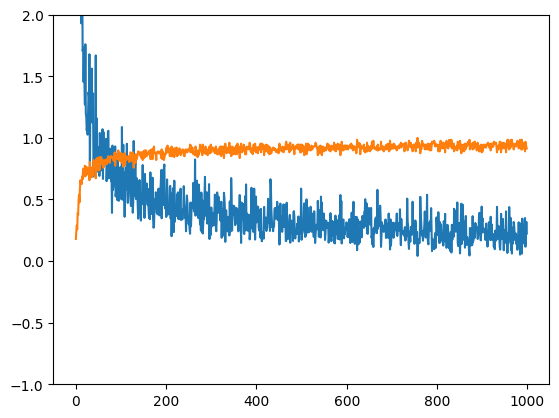

In [91]:
#training
optim = t.optim.SGD(model.parameters(),lr = .001, momentum = 0)
batch_size = 128
loss_func = nn.CrossEntropyLoss()
losses, accuracies = [], []
for k in range(1000):
    samp = np.random.randint(0, X_train.shape[0], size=(batch_size))
    X = t.tensor(X_train[samp])
    Y = t.tensor(Y_train[samp]).long()

    optim.zero_grad() #reset gradients
    out = model(X) #forward pass
    cat = t.argmax(out, dim=1) 
    accuracy = (cat == Y).float().mean() #check how many are right
    #run backprop
    loss = loss_func(out, Y)

    loss.backward()
    #do grad descent 
    
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    accuracies.append(accuracy)
    losses.append(loss)
    if k % 100 == 0:
        print("loss %.2f accuracy %.2f" % (loss, accuracy))
plt.ylim(-1,2)
plt.plot(losses)
plt.plot(accuracies)

In [93]:
#model evaluation
out = model(t.tensor(X_test))
cat = t.argmax(out, dim=1)
accuracy = (cat == t.tensor(Y_test)).float().mean()
accuracy

tensor(0.9240)